In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from data import loadlagrangeData,lagrange_points
G = 6.67e-11
Msun = 2e30
Me=5.97219e24
AU = 1.5e11
position=np.array([[0,0],[AU,0]])

θ = np.arctan2(position[1][1],position[1][0])
v0 = np.sqrt(G*Msun/AU) 
#v0,[-v0*np.sin(θ),v0*np.cos(θ)]

mass=[Msun,Me]
    
velocity=np.array([[0,0],[-v0*np.sin(θ),v0*np.cos(θ)]])

pos_list,vel_list = lagrange_points(G,mass,position)
pos_list.shape,pos_list[0].shape,pos_list[0:5].shape,

((5, 2), (2,), (5, 2))

In [8]:
#Nbody simulations N=20,Ts=1 step=100 33s
from data import loadlagrangeData
from numerical import SimulateOribt
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
Ts,step=1,300#
planet_name,all_positions,allenergy,alltotalenergy,method,T = SimulateOribt(loadlagrangeData(3,4,N=200),Ts,step,"4th order Runge-Kutta")

MovieWriter ffmpeg unavailable; using Pillow instead.


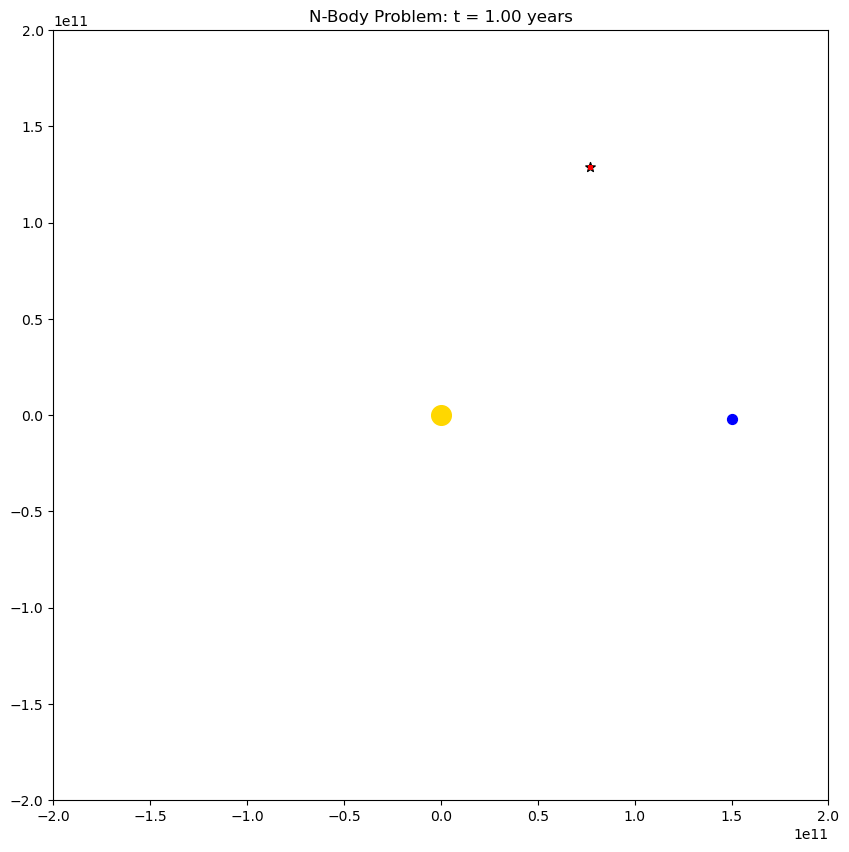

In [9]:
#plot 5 L
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Position data with 101 time steps
all_positions = np.array(all_positions)
N=all_positions.shape[1]
# Create scatter plot
lim = 2e11
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

# Label each point
color = ["gold","blue","black","green","green","green","black","black"]
color = ["gold","blue","black","red","red","red","red","red"]
labels = result_list = ['Sun' if i == 0 else 'Earth' if i == 1 else 'L' if i == 2 else list(range(1, 6))[(i - 2) % len(list(range(1, 6)))] for i in range(N)]
#labels = ['Sun', 'Earth', 'L1', 'L2', 'L3', 'L4', 'L5']
points = []
for i, label in enumerate(labels):
    if label == 'Sun':
        points.append(ax.scatter([], [], c=color[0], marker="o", s=200, label=label))
    elif label == 'Earth':
        points.append(ax.scatter([], [], c=color[1], marker="o", s=50, label=label))
    elif label == 'L':
        points.append(ax.scatter([], [], c=color[2], marker="*", s=50, label=label))  
    elif label == 1:
        points.append(ax.scatter([], [], marker='.', c=color[3],s=20, label=label))
    elif label == 2:
        points.append(ax.scatter([], [], marker='.', c=color[3], s=20, label=label))
    elif label == 3:
        points.append(ax.scatter([], [], marker='.', c=color[3], s=20, label=label))
    elif label == 4:
        points.append(ax.scatter([], [], marker='.', c=color[3], s=20, label=label))
    elif label == 5:
        points.append(ax.scatter([], [], marker='.', c=color[3],s=20, label=label))
    else:
        points.append(ax.scatter([], [], marker='.', c=color[3], s=20, label=labels[i]))
#all_positions=all_positions[::10]


# Update function for the animation
def update(frame):
    ax.set_title(f"N-Body Problem: t = {frame / step :.2f} years")
    for i in range(N):
        points[i].set_offsets([all_positions[frame, i]])
    return points
#all_positions=all_positions[::2]
# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(all_positions)), interval=50, blit=True)
ani.save('gif/animation.gif')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


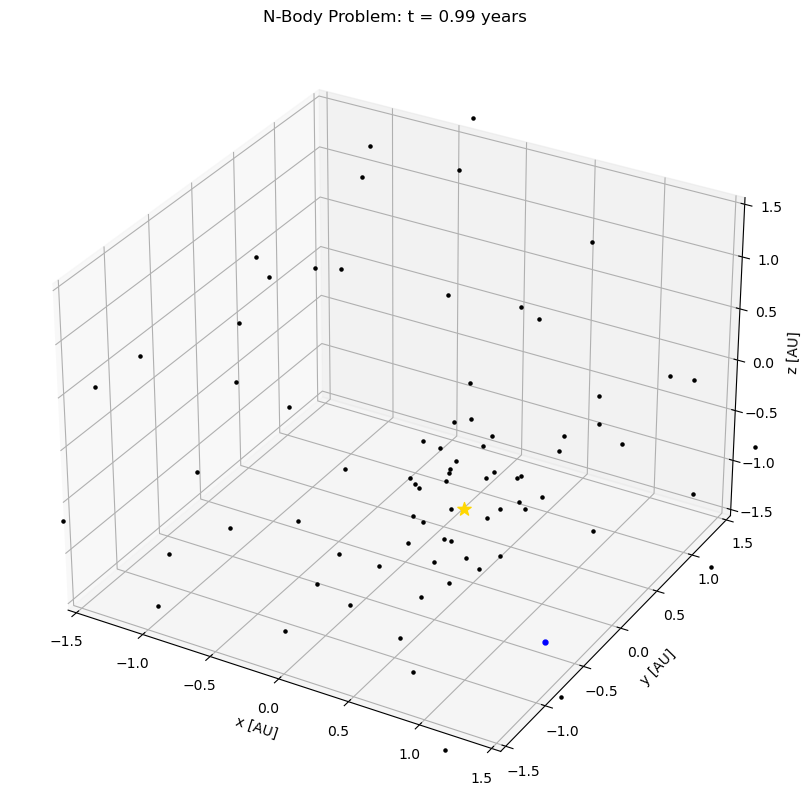

In [7]:
#plot 3d n body
#Nbody simulations N=100,step=10040s
from data import loadNBodyData
from numerical import SimulateOribt
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
Ts,step=1,1000#loadNBodyData(100)
planet_name,all_positions,allenergy,alltotalenergy,method,T = SimulateOribt(loadNBodyData(100),Ts,step,"4th order Runge-Kutta")
t=range(0,step,1)
lim=1.5
def update(frame):
    ax.clear()
    ax.set_title(f"N-Body Problem: t = {t[frame] / step :.2f} years")
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)
    ax.set_xlabel("x [AU]")
    ax.set_ylabel("y [AU]")
    ax.set_zlabel("z [AU]")
    coords = all_positions[frame]
    for n in range(len(coords)):
        if n == 0:
            ax.scatter(coords[n][0] , coords[n][1] , coords[n][2] , c="gold", marker="*", s=100, label="Central star")
        elif n == 1:
            ax.scatter(coords[n][0] , coords[n][1] , coords[n][2] , c="Blue", marker=".", s=20, label="Central star")    
        else:
            ax.scatter(coords[n][0] , coords[n][1] , coords[n][2] , c="Blue", marker=".", s=20)

# Create and save the 3D animation
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ani = FuncAnimation(fig, update, frames=range(0, len(t), 1), interval=50)
ani.save('gif/animation.gif')
plt.show()

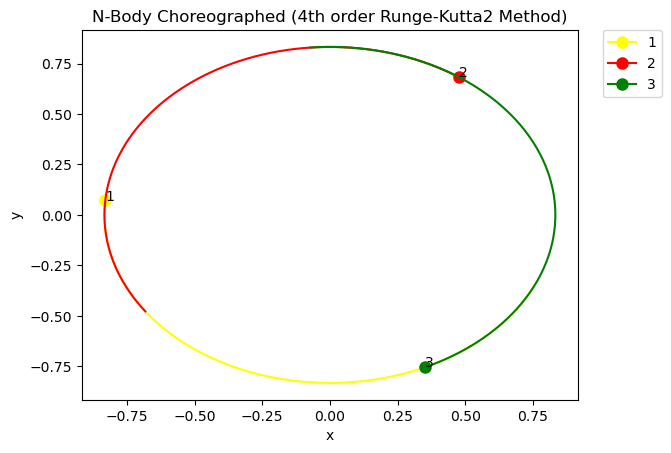

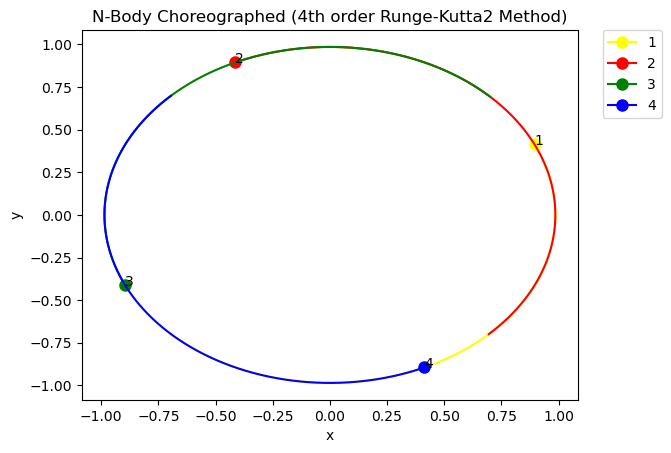

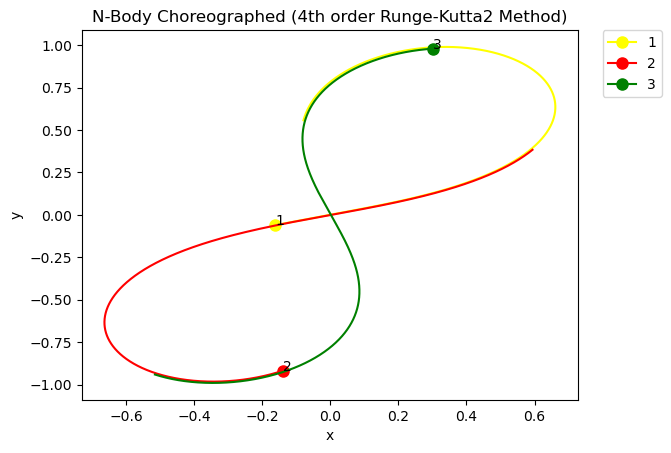

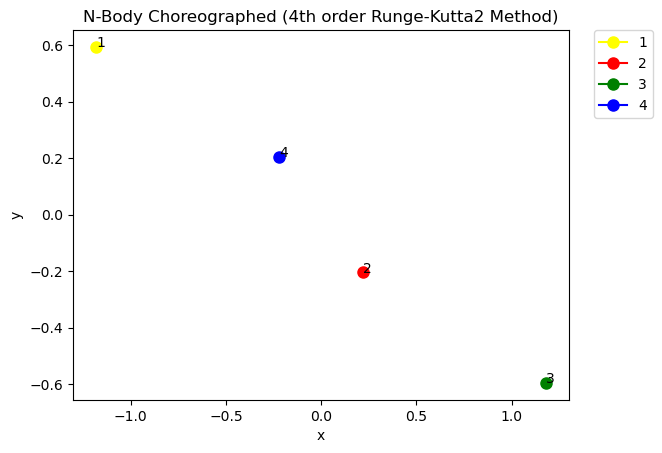

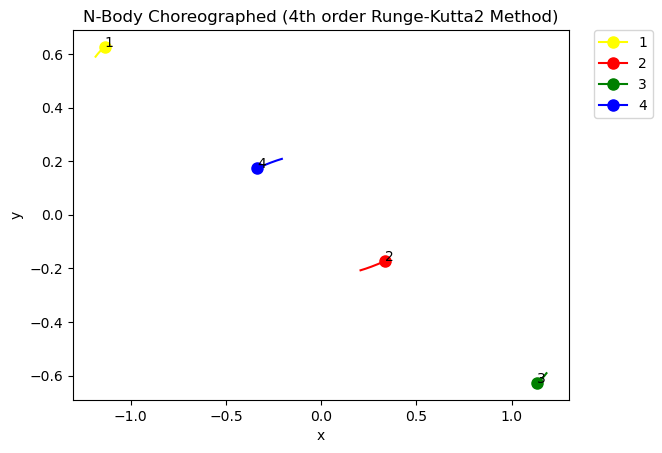

In [6]:
#NBodyChoreographedData
from data import loadNBodyChoreographedData
from numerical import SimulateOribt
from numericalplot import plot_orbit
for case in range(4):
    planet_name,all_positions,allenergy,alltotalenergy,method,T=SimulateOribt(loadNBodyChoreographedData(case),1/3,10000,"4th order Runge-Kutta")
    plot_orbit(planet_name,all_positions,method,"2d","N-Body Choreographed")
planet_name,all_positions,allenergy,alltotalenergy,method,T=SimulateOribt(loadNBodyChoreographedData(case),1,10000,"4th order Runge-Kutta")
plot_orbit(planet_name,all_positions,method,"2d","N-Body Choreographed")


0.0029622999999999997 1000


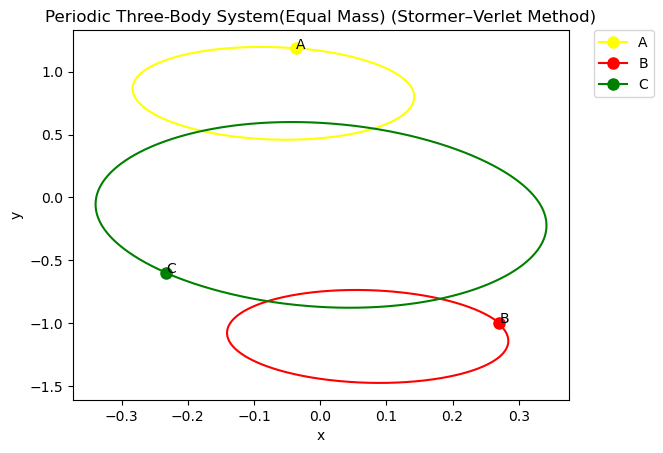

0.002246101255307486 1000


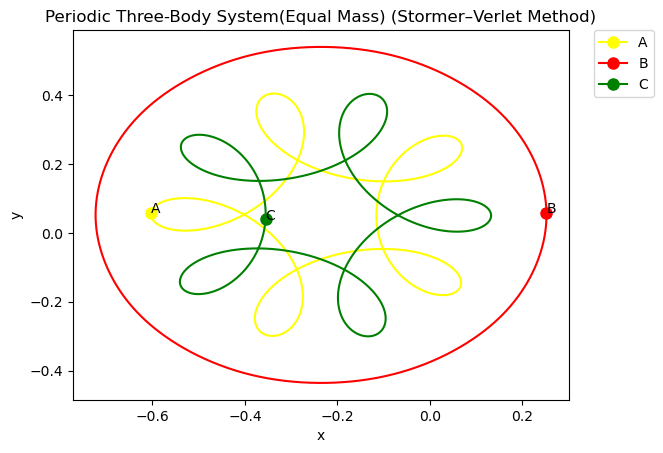

0.005 1000


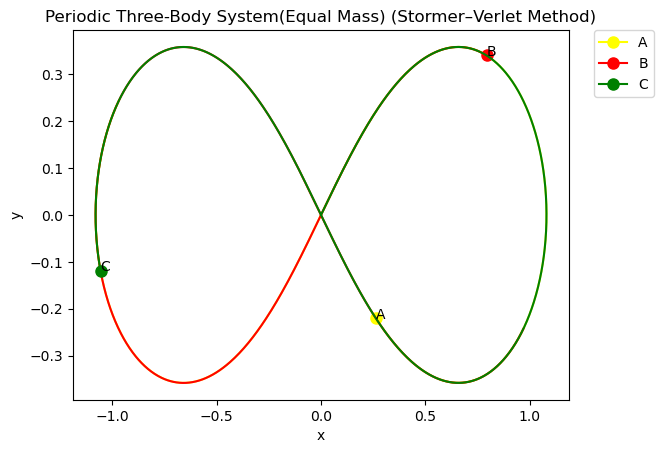

0.008094721472532424 1000


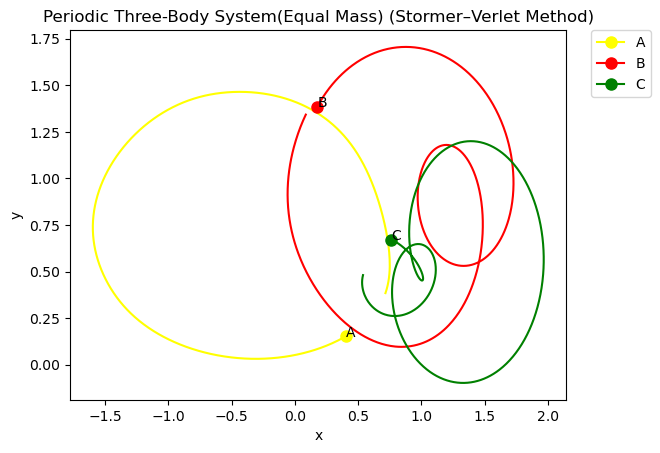

0.012 1000


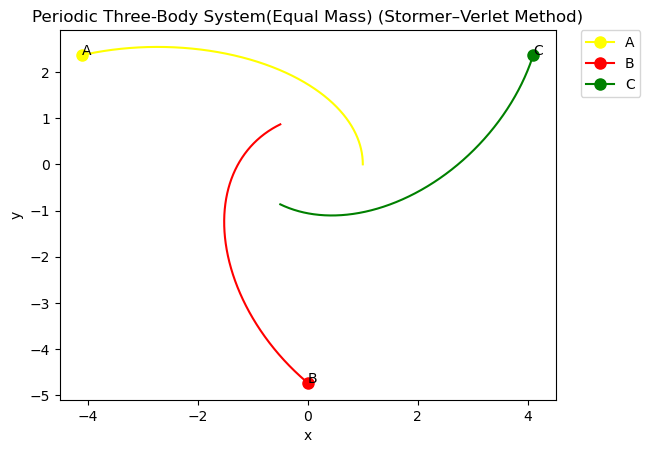

0.004012156415940929 1000


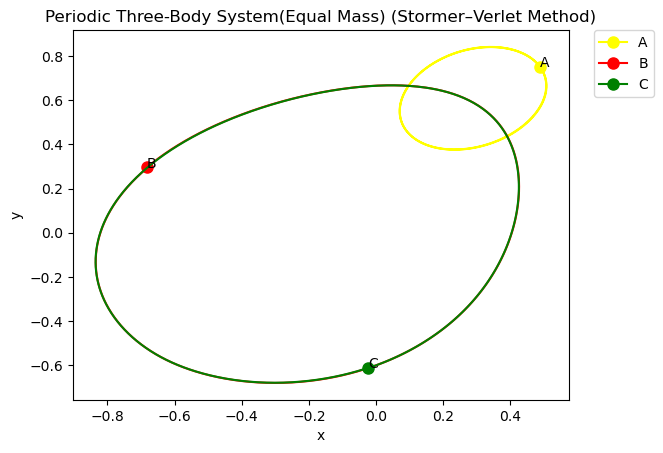

0.00502605500480871 1000


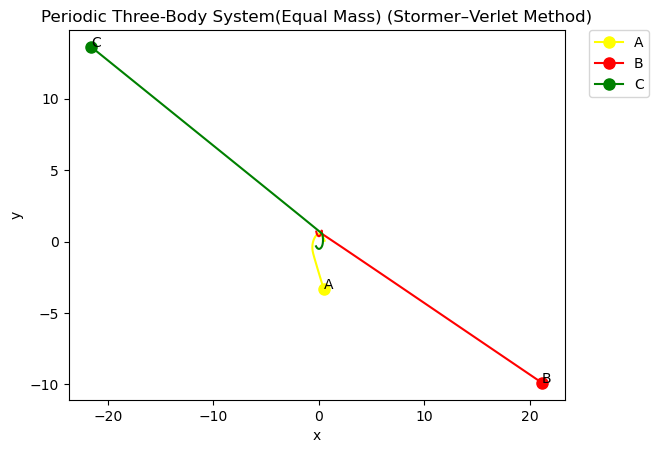

0.0051794845377091 1000


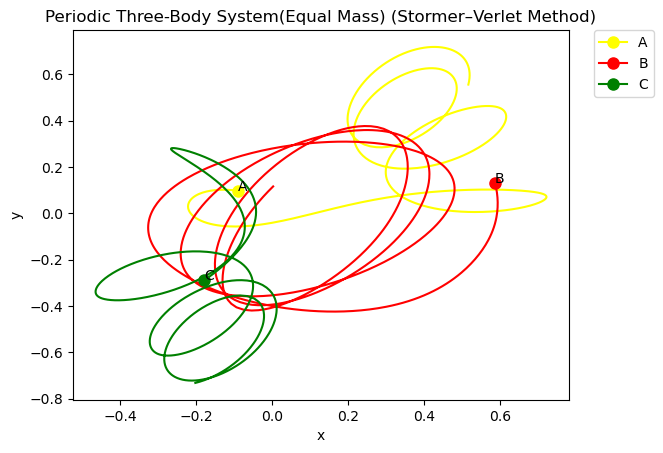

0.005095053913455357 1000


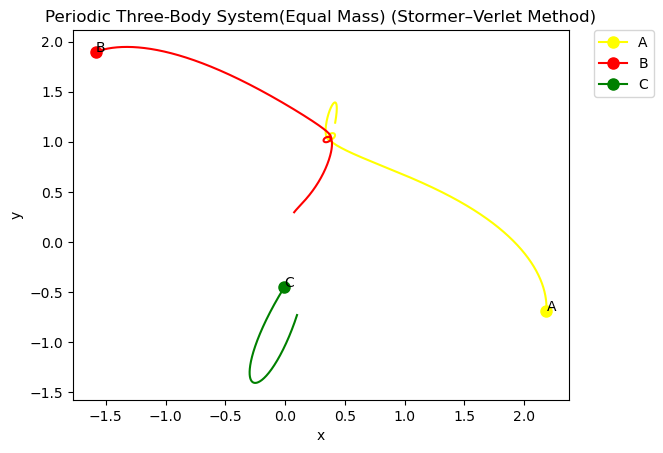

0.006868155929188273 1000


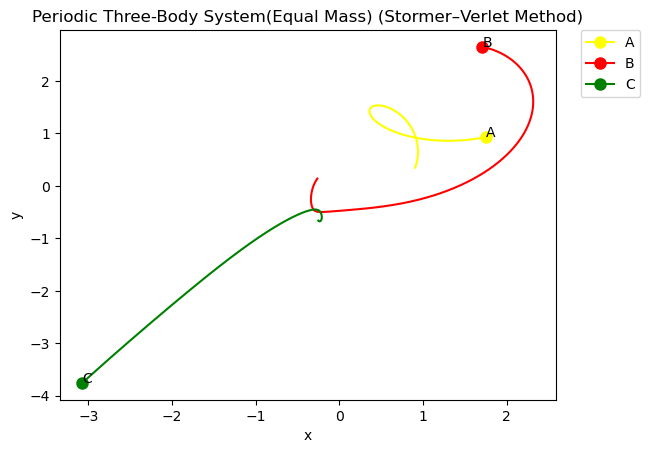

0.006868155929188273 1000


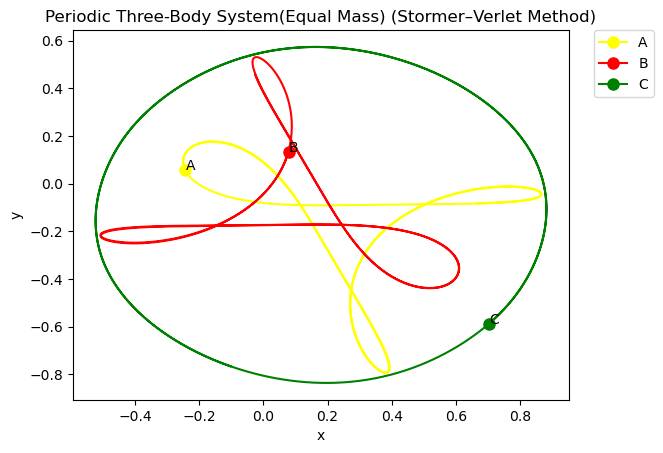

0.006868155929188273 1000


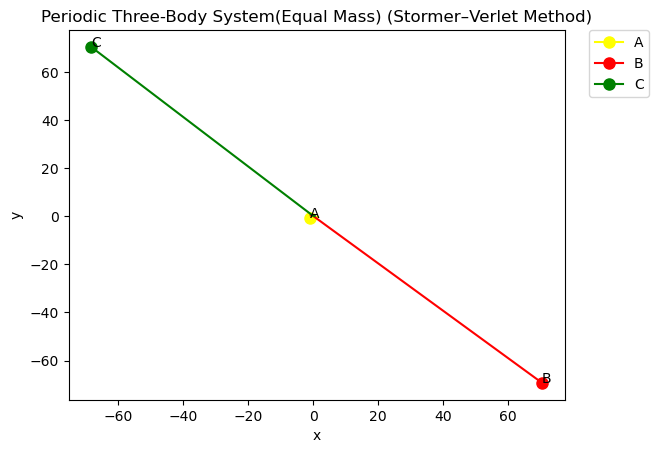

0.006868155929188273 1000


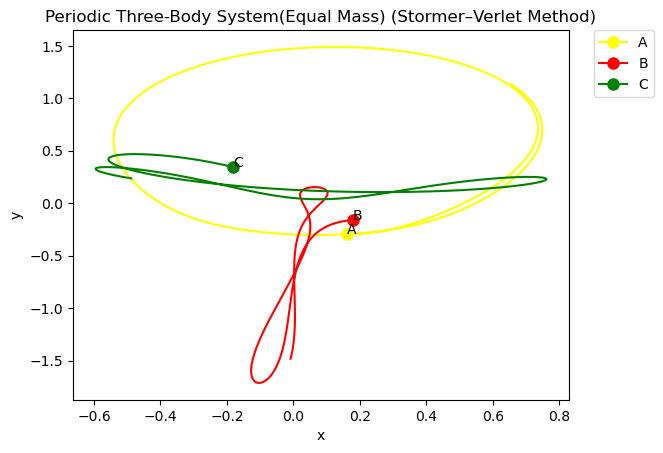

0.006868155929188273 1000


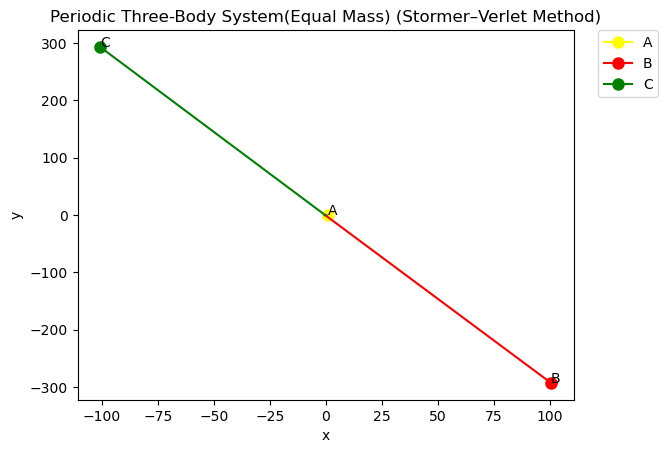

0.006868155929188273 1000


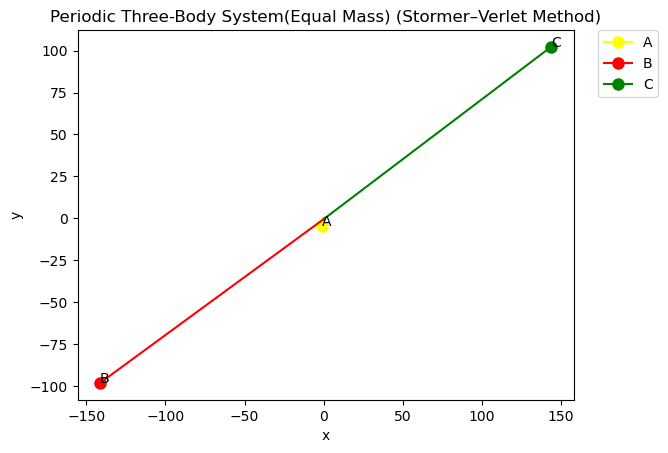

0.005956867234319493 1000


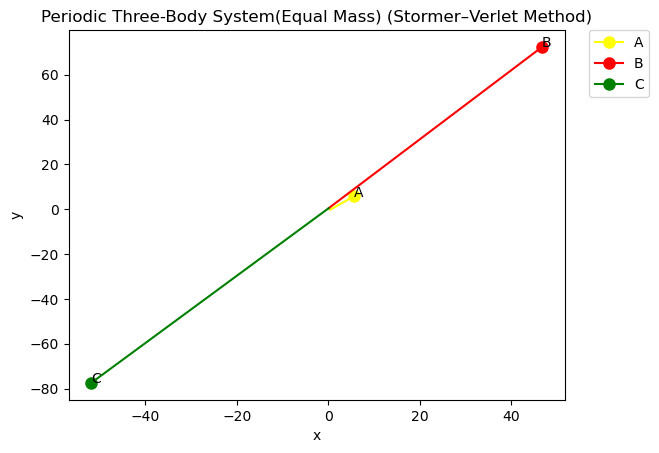

0.0012530882485681828 1000


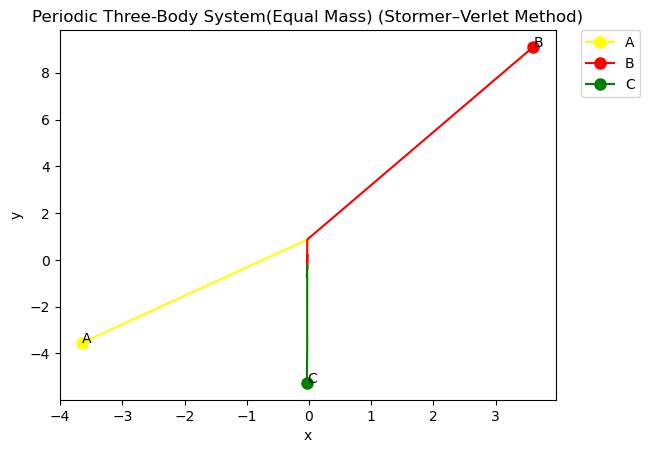

In [6]:
#Three body loadPeriodicThreeBodyData 17
from data import loadPeriodicThreeBodyData
from numerical import SimulateOribt
from numericalplot import plot_orbit
method ="Stormer–Verlet"
#method ="4th order Runge-Kutta"
for i in range(17):
    planet_name,all_positions,allenergy,alltotalenergy,method,T=SimulateOribt(loadPeriodicThreeBodyData(i),1,1000,method)
    plot_orbit(planet_name,all_positions,method,"2d","Periodic Three-Body System(Equal Mass)")

2.4929737031533337e-05 3000000


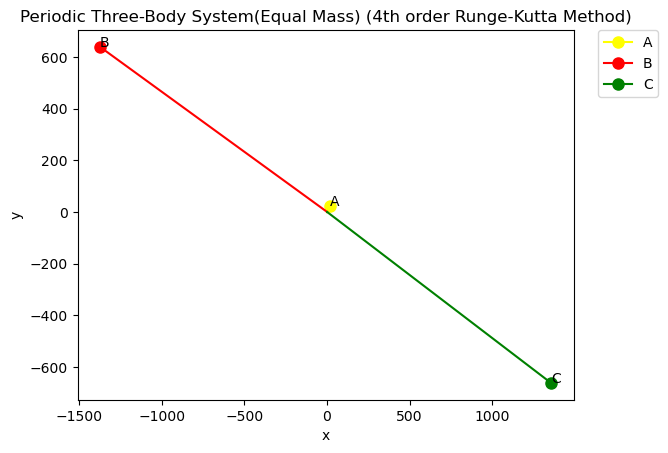

In [3]:
#Three body loadPeriodicThreeBodyData Li 
from data import loadThreeBodyequalmassData
from numerical import SimulateOribt
from numericalplot import plot_orbit
#4th order Runge-Kutta "Stormer–Verlet
#step 100,30k,30k,68:3000k+
planet_name,all_positions,allenergy,alltotalenergy,method,T=SimulateOribt(loadThreeBodyequalmassData(-1),1,3000000,"4th order Runge-Kutta")
plot_orbit(planet_name,all_positions,method,"2d","Periodic Three-Body System(Equal Mass)")

10.0 1095.890410958904


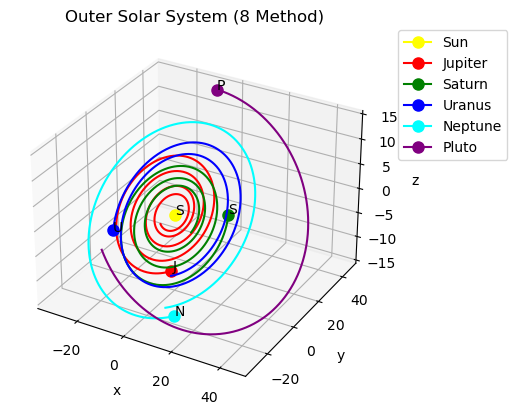

10.0 1095.890410958904


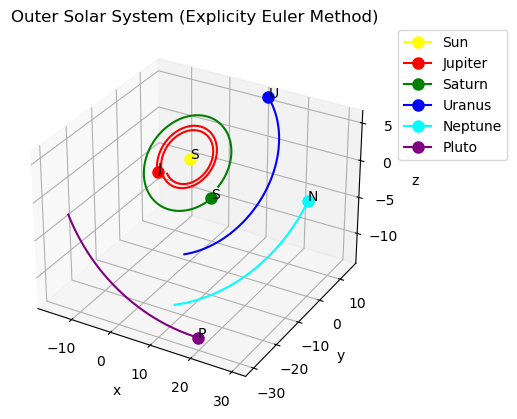

10.0 1095.890410958904


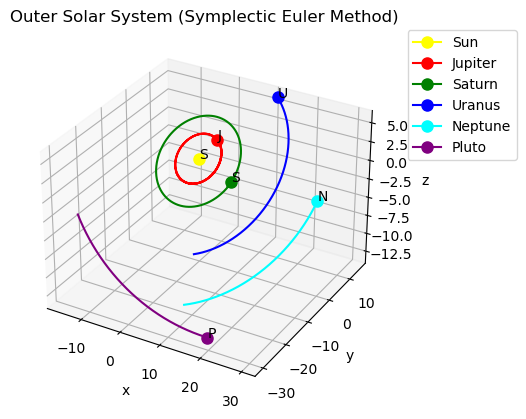

10.0 1095.890410958904


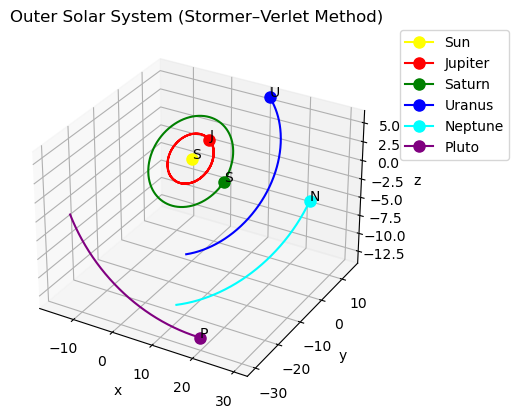

10.0 1095.890410958904


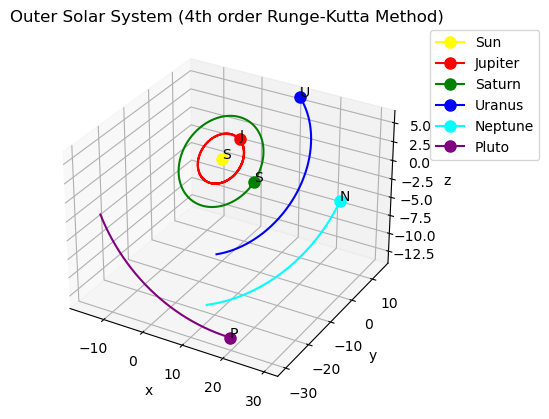

[3.2129156589508057,
 0.5855312347412109,
 0.5755233764648438,
 0.8978159427642822,
 1.541398525238037]

In [1]:
#OuterSolar system simulations 200000,10, 50s
#Efficiency evaluation
import time
from data import loadOuterSolarData
from numerical import SimulateOribt
from numericalplot import plot_orbit
execution_time=[]
methods=["8","Explicity Euler","Symplectic Euler","Stormer–Verlet","4th order Runge-Kutta"]
for m in methods:
    start_time = time.time()
    planet_name,all_positions,allenergy,alltotalenergy,method,T=SimulateOribt(loadOuterSolarData,2000/365,2000/10,m)
    # Record the end time
    end_time = time.time()
    execution_time.append(end_time - start_time)
    plot_orbit(planet_name,all_positions,method,"3d","Outer Solar System")
execution_time

In [ ]:
#Inner system simulations
#OuterSolar system simulations
#Efficiency evaluation
#%matplotlib
import time
from data import loadInnerSolarData
from numerical import SimulateOribt
from numericalplot import plot_orbit
execution_time=[]
methods=["Explicity Euler","Symplectic Euler","Stormer–Verlet","4th order Runge-Kutta"]
for m in methods:
    start_time = time.time()
    planet_name,all_positions,allenergy,alltotalenergy,method,T=SimulateOribt(loadInnerSolarData,20000/365,20000/1,m)
    # Record the end time
    end_time = time.time() 
    execution_time.append(end_time - start_time)
    plot_orbit(planet_name,all_positions,method,"3d","Inner Solar System")
execution_time

In [7]:
from data import loadOuterSolarData 
from numerical import SimulateOribt,Totalenergy,energy_H
G,planet_name,mass,position,momenta,T=loadOuterSolarData()
energy_H(G,mass,momenta,position),Totalenergy(G,mass,momenta,position)


(51242857255185.07, -4.25462340650994e-08)

In [ ]:
#plot energy
from numericalplot import plot_energy
methods=["Explicity Euler","Symplectic Euler","Stormer–Verlet","4th order Runge-Kutta"]
#methods=["Symplectic Euler"]
days=2000
plot_energy(methods,days/365,days/100)
#methods=["Stormer–Verlet"]
#plot_energy(methods,days/365,days/1000)


10.0 1095.890410958904
10.0 1095.890410958904
10.0 1095.890410958904
10.0 1095.890410958904
10.0 1095.890410958904


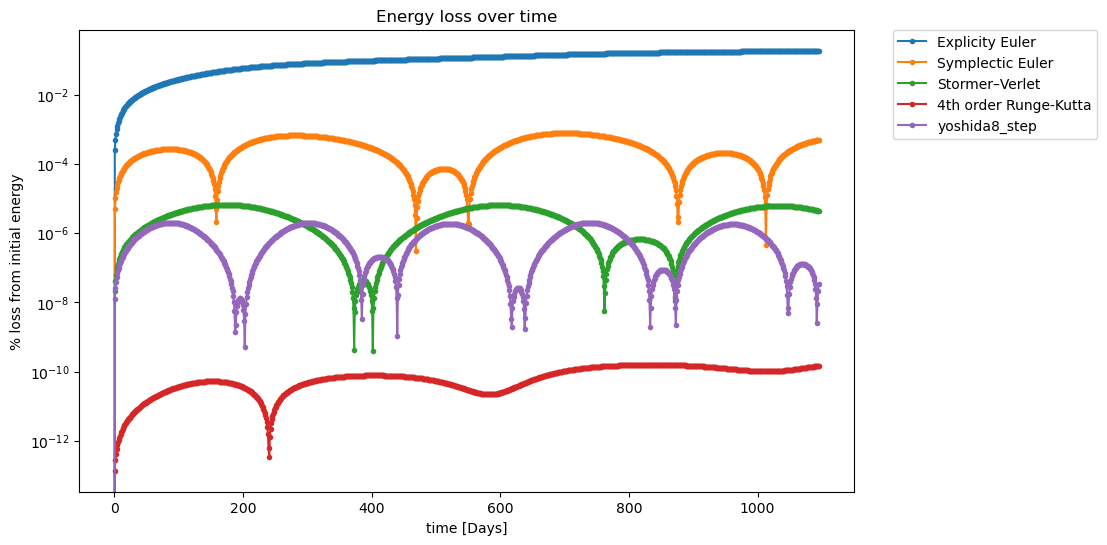

In [1]:
#plot energy loss log
from numericalplot import plot_energyloss
methods=["Explicity Euler","Symplectic Euler","Stormer–Verlet","4th order Runge-Kutta","yoshida8_step"]
plot_energyloss(methods,2000/365,2000/10,log=1)

In [3]:
#plot energy loss no log
from numericalplot import plot_energyloss
methods=["Explicity Euler","Symplectic Euler","Stormer–Verlet","4th order Runge-Kutta","4th order Runge-Kutta2"]
plot_energyloss(methods,20000/365,20000/10,log=0)

TypeError: plot_energyloss() got an unexpected keyword argument 'log'

In [ ]:
def generate_random_coordinates(num_points, min_length, max_length):
    coordinates = []
    for _ in range(num_points):
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2 * np.pi)
        r = np.random.uniform(min_length, max_length)
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)
        coordinates.append((x, y, z))
    return np.array(coordinates)

def loadThreeBodySpecialData():
    G = 2.95912208286 * (10**-4)
    planet_name=["A","B","C"]
    mass=np.array([1,1,1])
    R=1
    position = np.vstack((np.zeros((1, 3)), generate_random_coordinates(2, np.sqrt(3)*R, np.sqrt(3)*R)))
    velocity =[]
    for i,pos in enumerate(position[1:]):
        vel=0.93*np.sqrt(2*G*mass[i+1])/3/np.linalg.norm(position[i+1])
        velocity.append(vel)
    velocity = np.vstack((np.zeros((1, 3)), np.array([generate_random_coordinates(1, vel, vel)for vel in velocity]).reshape(2,3)))           
    momenta = np.array([mass[i]*velocity[i] for i in range(len(velocity))])
    return G,planet_name,mass,position,momenta
def loadEuler():
    G = 6.67430e-11
    planet_name=["A","B","C"]
    mass=np.array([3,4,5])
    
    Escapevelocity=np.sqrt(4)
    position=np.array([[1,3,0],
          [-2, -1,0],
          [1, -1,0]
          ])
    velocity=np.array([[0,0,0],
          [0,0,0],
          [0,0,0]
          ])
    
    momenta = np.array([mass[i]*velocity[i] for i in range(len(velocity))])
    return G,planet_name,mass,position,momenta

def loadtwoBodyData():
    G = 2.95912208286 * (10**-4)
    planet_name=["A","B"]
    mass=np.array([1,1])
    R=1
    position=np.array([[0,0,0],
          [-1,-1,-1]
          ])
    velocity=np.array([[0,0,0],
          [0.005,-0.005,-0.005]
          ])
    momenta = np.array([mass[i]*velocity[i] for i in range(len(velocity))])
    return G,planet_name,mass,position,momenta
def loadtwoBodyData():
    G = 2.95912208286 * (10**-4)
    planet_name=["A","B"]
    mass=np.array([1,1])
    R=1
    position=np.array([[0,0,0],
          [-0.1,-0.1,0]
          ])
    velocity=np.array([[0,0,0],
          [0.0005,-0.0005,0]
          ])
    momenta = np.array([mass[i]*velocity[i] for i in range(len(velocity))])
    return G,planet_name,mass,position,momenta

